In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

from utils import GraphGenerator
from utils import FlowGenerator

erdos_renyi_graph = GraphGenerator.erdos_renyi_generator(n=200, p=0.1)  # Example parameters
waxman_graph = GraphGenerator.waxman_generator_1(n=200, alpha=0.1, beta=0.1)  # Example parameters

graphs = {
    'Erdos-Renyi': erdos_renyi_graph,
    'Waxman': waxman_graph
}

number_of_flows = [i for i in range(0, 100001, 10000)]

Evaluating edge 1,2
Evaluating edge 1,3
Evaluating edge 1,4
Evaluating edge 1,5
Evaluating edge 1,6
Evaluating edge 1,7
Evaluating edge 1,8
Evaluating edge 1,9
Evaluating edge 1,10
Evaluating edge 1,11
Evaluating edge 1,12
Evaluating edge 1,13
Evaluating edge 1,14
Evaluating edge 1,15
Evaluating edge 1,16
Evaluating edge 1,17
Evaluating edge 1,18
Evaluating edge 1,19
Evaluating edge 1,20
Evaluating edge 1,21
Evaluating edge 1,22
Evaluating edge 1,23
Evaluating edge 1,24
Evaluating edge 1,25
Evaluating edge 1,26
Evaluating edge 1,27
Evaluating edge 1,28
Evaluating edge 1,29
Evaluating edge 1,30
Evaluating edge 1,31
Evaluating edge 1,32
Evaluating edge 1,33
Evaluating edge 1,34
Evaluating edge 1,35
Evaluating edge 1,36
Evaluating edge 1,37
Evaluating edge 1,38
Evaluating edge 1,39
Evaluating edge 1,40
Evaluating edge 1,41
Evaluating edge 1,42
Evaluating edge 1,43
Evaluating edge 1,44
Evaluating edge 1,45
Evaluating edge 1,46
Evaluating edge 1,47
Evaluating edge 1,48
Evaluating edge 1,49


In [2]:
def generate_switch_flow_list(flows) -> dict[int, [int]]:
    switch_flow_dict = {}

    for flow_id, switches in flows.items():
        for switch_id in switches:
            switch_id = int(switch_id)
            switch_flow_dict.setdefault(switch_id, set()).add(flow_id)

    return {switch_id: list(flow_ids) for switch_id, flow_ids in switch_flow_dict.items()}

In [3]:
from utils.SetCover import set_cover_solve

def calculate_naive_cost(graph, flows):
    # Each request is 122 bytes and each reply is 174 bytes
    request_size = 122
    reply_size = 174
    total_cost = 0

    for flow in flows.values():
        total_cost += request_size + reply_size

    return total_cost

def calculate_optimized_cost(flow_ids, switch_flow_list):
    optimized_set = set_cover_solve(flow_ids, switch_flow_list)
    total_cost = 0
    
    for switch_id, flows in optimized_set.items():
        total_cost += 122 + 78 + 96 * len(flows)
        
    return total_cost

# Figure 4

In [ ]:
results = []

for name, graph in graphs.items():
    for flow_count in number_of_flows:
        flows = FlowGenerator.generate_random_flows(flow_count, graph)
        flow_ids = list(flows.keys())
        switch_flow_list = generate_switch_flow_list(flows)
        
        naive_cost = calculate_naive_cost(graph, flows)
        optimized_cost = calculate_optimized_cost(flow_ids, switch_flow_list)
        results.append({
            'Graph': name,
            'Number of Flows': flow_count,
            'Naive Cost': naive_cost,
            'Optimized Cost': optimized_cost
        })

Flow 0 generated.
Flow 1 generated.
Flow 2 generated.
Flow 3 generated.
Flow 4 generated.
Flow 5 generated.
Flow 6 generated.
Flow 7 generated.
Flow 8 generated.
Flow 9 generated.
Flow 10 generated.
Flow 11 generated.
Flow 12 generated.
Flow 13 generated.
Flow 14 generated.
Flow 15 generated.
Flow 16 generated.
Flow 17 generated.
Flow 18 generated.
Flow 19 generated.
Flow 20 generated.
Flow 21 generated.
Flow 22 generated.
Flow 23 generated.
Flow 24 generated.
Flow 25 generated.
Flow 26 generated.
Flow 27 generated.
Flow 28 generated.
Flow 29 generated.
Flow 30 generated.
Flow 31 generated.
Flow 32 generated.
Flow 33 generated.
Flow 34 generated.
Flow 35 generated.
Flow 36 generated.
Flow 37 generated.
Flow 38 generated.
Flow 39 generated.
Flow 40 generated.
Flow 41 generated.
Flow 42 generated.
Flow 43 generated.
Flow 44 generated.
Flow 45 generated.
Flow 46 generated.
Flow 47 generated.
Flow 48 generated.
Flow 49 generated.
Flow 50 generated.
Flow 51 generated.
Flow 52 generated.
Flo

# Save Results to CSV

In [ ]:
timestamp = time.strftime("%Y%m%d-%H%M%S")
filename = f"data/figure_4_{timestamp}.csv"

# Ensure the stats directory exists
os.makedirs(os.path.dirname(filename), exist_ok=True)

# Convert results to DataFrame and save as CSV
df = pd.DataFrame(results)
df.to_csv(filename, index=False)

print(f"Results saved to {filename}")

# Plot the Graph Figure 4

In [7]:
# Plot the graph
df = pd.read_csv(filename)

plt.figure(figsize=(10, 6))
for graph in df['Graph'].unique():
    graph_df = df[df['Graph'] == graph]
    plt.plot(graph_df['Number of Flows'], graph_df['Naive Cost'], label=f'{graph} graph (Naive)')
    plt.plot(graph_df['Number of Flows'], graph_df['Optimized Cost'], label=f'{graph} graph (Optimized)', linestyle='--')

plt.xlabel('The number of active flows')
plt.ylabel('Total communication cost (bytes)')
plt.title('Total communication cost in different graph models')
plt.legend()
plt.grid(True)
plt.show()

# Figure 10

In [31]:
initial_flows = 100
req_cost = 122
header_cost = 78
stats_per_flow = 96
graph = graphs["Erdos-Renyi"]
flows = generate_random_flows(graph, initial_flows)
flow_ids = list(flows.keys())
switch_flow_list = generate_switch_flow_list(flows)

# Simulation parameters
simulation_time = 60  # seconds
recompute_interval = 5  # seconds

# Unique flow ID counter for new flows
flow_id_counter = max(flow_ids) + 1

# Initialize results
results = {
    'Time': [],
    'Per-flow Cost': [],
    'Recompute Cost': [],
    'Heuristic Cost': []
}
# Initialize heuristic data
current_optimized_set = set_cover_solve(flow_ids, switch_flow_list)
last_recompute_time = 0

# Run the simulation
for t in range(simulation_time):
    # Add new flows
    new_flow_count = random.randint(0, 10)
    new_flows = generate_random_flows(graph, new_flow_count)
    
    for flow in new_flows.values():
        flows[flow_id_counter] = flow
        flow_id_counter += 1
        
     # Randomly delete flows
    delete_flow_count = random.randint(0, 10)
    if delete_flow_count > 0 and flows:
        delete_keys = random.sample(list(flows.keys()), min(delete_flow_count, len(flows)))
        for key in delete_keys:
            del flows[key]
    
    flow_ids = list(flows.keys())
    switch_flow_list = generate_switch_flow_list(flows)
    
     # Check if the new flows are already covered
    covered_flows = set()
    for flow_id, path in new_flows.items():
        for switch_id in path:
            if switch_id in current_optimized_set:
                covered_flows.add(flow_id)
                break
    
    # Calculate costs per-flow
    per_flow_cost = calculate_naive_cost(graph, flows)
    
    # Recompute
    recompute_cost = calculate_optimized_cost(flow_ids, switch_flow_list)
    
    # Heruistic
    if t % recompute_interval == 0:
        heuristic_cost = calculate_optimized_cost(flow_ids, switch_flow_list)
        current_optimized_set = set_cover_solve(flow_ids, switch_flow_list)
        last_recompute_time = t
    else:
        for flow_id in new_flows:
            if flow_id not in covered_flows:
                heuristic_cost += req_cost + header_cost + stats_per_flow
            else: 
                heuristic_cost += stats_per_flow
    if t - last_recompute_time >= recompute_interval:
        current_optimized_set = set_cover_solve(flow_ids, switch_flow_list)
        last_recompute_time = t
    
    # Update results
    results['Time'].append(t)
    results['Per-flow Cost'].append(per_flow_cost)
    results['Recompute Cost'].append(recompute_cost)
    results['Heuristic Cost'].append(heuristic_cost)

# Save Results to CSV

In [32]:
# Convert results to DataFrame
df = pd.DataFrame(results)

# Save results to CSV
timestamp = time.strftime("%Y%m%d-%H%M%S")
filename = f"data/figure_10_{timestamp}.csv"

# Ensure the data directory exists
os.makedirs(os.path.dirname(filename), exist_ok=True)

# Save DataFrame to CSV
df.to_csv(filename, index=False)

print(f"Results saved to {filename}")

# Plot the Graph Figure 10

In [33]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Per-flow Cost'], label='Per-flow method', color='red')
plt.plot(df['Time'], df['Recompute Cost'], label='Recompute method', color='blue')
plt.plot(df['Time'], df['Heuristic Cost'], label='Flow change heuristic', color='green')

plt.xlabel('Time (s)')
plt.ylabel('Total communication cost (bytes)')
plt.title('The performance of the flow change heuristic')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Graph Figure 10

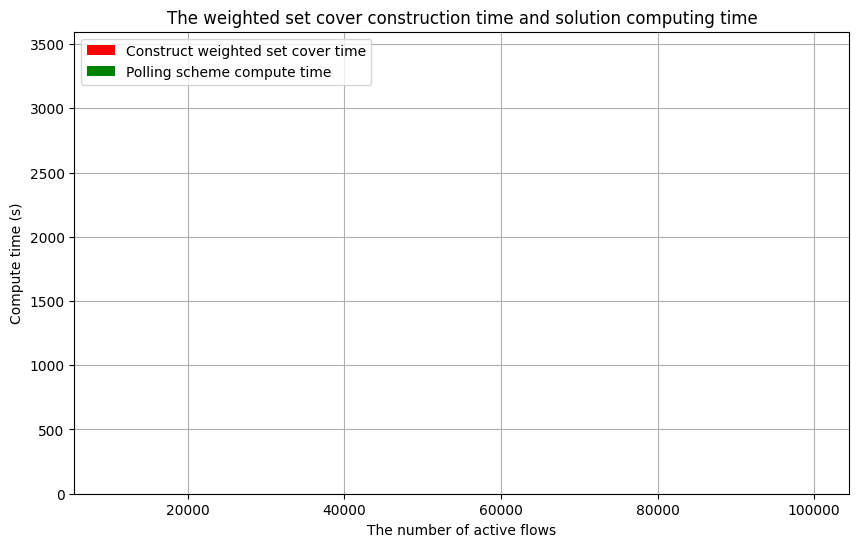

In [25]:
# Read the CSV file
df = pd.read_csv('data/timing_results.csv')

# Convert times from milliseconds to seconds for better readability
df['Construction Time (s)'] = df['Construction Time (ms)'] / 1000
df['Calculation Time (s)'] = df['Calculation Time (ms)'] / 1000

# Plot the results
plt.figure(figsize=(10, 6))

# Use a logarithmic scale if needed
plt.yscale('log')

# Plotting the construction time
plt.bar(df['Number of Active Flows'], df['Construction Time (s)'], label='Construct weighted set cover time', color='red')

# Plotting the calculation time, stacked on top of the construction time
plt.bar(df['Number of Active Flows'], df['Calculation Time (s)'], bottom=df['Construction Time (s)'], label='Polling scheme compute time', color='green')

plt.xlabel('The number of active flows')
plt.ylabel('Compute time (s)')
plt.title('The weighted set cover construction time and solution computing time')
plt.legend()
plt.grid(True)
plt.show()
